In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv("/config/workspace/dataset/diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Perform Feature engineering and EDA

In [6]:
# summary of the dataset-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# descriptive statistic of dataset-
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# check for missing values-
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# check for duplicate records-
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [10]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
# it is an imbalanced dataset. But we can't add more 1 entries because 

In [12]:
# we observe from descriptive stats that Glucose, BloodPressure, SkinThickness, Insulin, Bmi have min as 0. 
# so there are certain records of these coloumns which have 0 as value. 
# these columns can't have 0 value (common sense) so we can either drop those records or replace with mean value. We will do the later.

In [13]:
df["Glucose"]= df["Glucose"].replace(0, df["Glucose"].mean())
df["BloodPressure"]= df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["SkinThickness"]= df["SkinThickness"].replace(0, df["SkinThickness"].mean())
df["Insulin"]= df["Insulin"].replace(0, df["Insulin"].mean())
df["BMI"]= df["BMI"].replace(0, df["BMI"].mean())

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

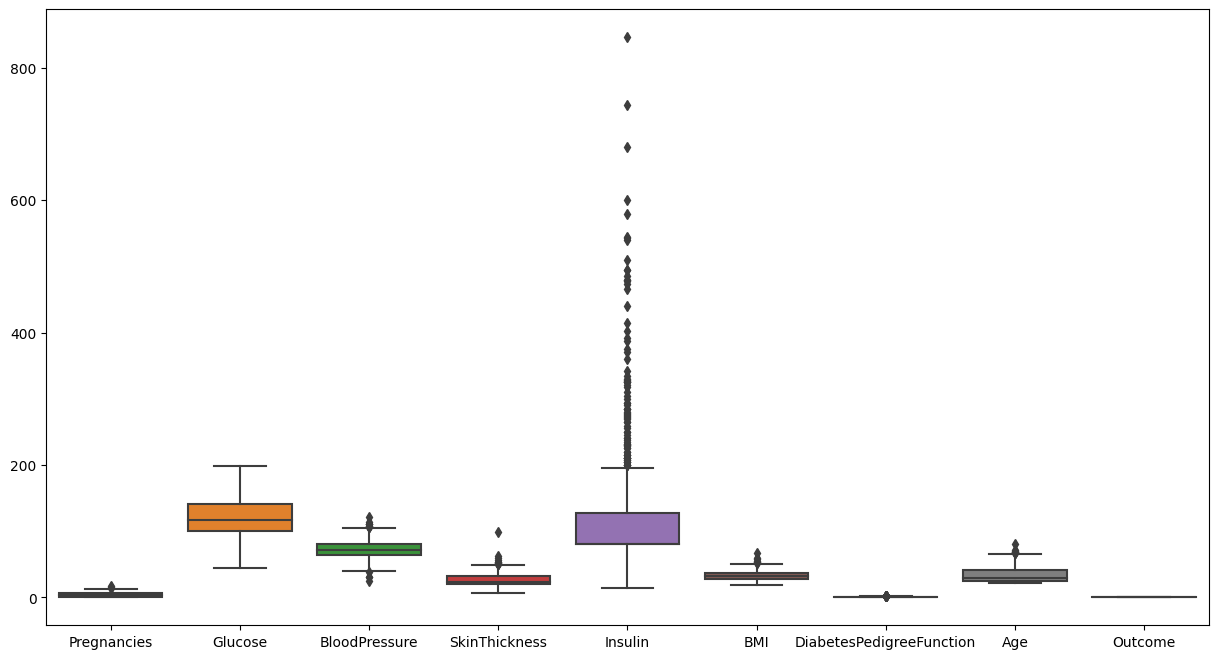

In [16]:
# check for outliers-
plt.figure(figsize=(15,8))
sns.boxplot(data= df)

In [17]:
# we see there are many outliers in insulin, high insulin levels indicate a highly diabetic person
# we won't remove these outliers because they are important

#### Split dataset-

In [18]:
# Outcome is the dependent feature where 0 indicates no diabetes and 1 indicates diabetes
# rest all are independent features

X= df.drop("Outcome", axis=1)
y= df["Outcome"]

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
# Train-Test split-
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [24]:
y_train.shape, y_test.shape

((576,), (192,))

#### Standardize the data-

In [41]:

# the range of values vary widely so we will standardize them. Also, for the outliers this is a good way-
from sklearn.preprocessing import StandardScaler
import pickle
def scaling(X_train, X_test):
    scaler= StandardScaler()
    X_train_scaled= scaler.fit_transform(X_train)
    X_test_scaled= scaler.transform(X_test)
    file= open("/config/workspace/pickled_models/standard_scaler.pkl", "wb")
    pickle.dump(scaler, file)
    file.close()
    return X_train_scaled, X_test_scaled

In [42]:
X_train_scaled, X_test_scaled= scaling(X_train, X_test)

In [27]:
X_train_scaled

array([[ 2.80346794,  0.24258793, -0.25110513, ...,  1.10366684,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.24258793,  1.14476384, ...,  0.40523314,
        -0.70087555, -0.86295593],
       [-0.22446668, -2.01997244,  0.81427371, ...,  0.30337823,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.68905457,  1.14476384, ...,  1.93305686,
         1.96850229,  0.44167036],
       [-1.13284707,  0.64186329, -0.25110513, ...,  1.46743439,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.10949615,  1.97098917, ..., -1.42815531,
        -0.6094383 , -1.03690611]])

#### Training the model-

In [28]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [29]:
# hyperparameter tuning-
from sklearn.model_selection import GridSearchCV
parameters= {"penalty": ("l1", "l2"), "solver": ("lbfgs", "liblinear", "newton-cg"), "C": np.logspace(-3,3,7)}
clf= GridSearchCV(estimator= logreg, param_grid= parameters, scoring= "accuracy", cv= 10)

In [30]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2'),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg')},
             scoring='accuracy')

In [31]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [32]:
clf.best_score_

0.7759225650332727

In [33]:
# using these hyperparameters we train our logistic regression model-
logreg= LogisticRegression(penalty= "l1", solver= "liblinear", C= 0.1)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

#### Result prediction-

In [34]:
y_pred= logreg.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [35]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

#### Confusion Matrix, Accuracy, Precision, Recall-

In [36]:
# confusion matrix-
from sklearn.metrics import confusion_matrix
confmat= confusion_matrix(y_test, y_pred)
confmat

array([[99, 24],
       [28, 41]])

In [37]:
# accuracy-
TP= confmat[0][0]
FP= confmat[0][1]
FN= confmat[1][0]
TN= confmat[1][1]

accuracy= (TP+TN)/(TP+FP+FN+TN)
accuracy

0.7291666666666666

In [38]:
# precision-
precision= TP/(TP+FP)
precision

0.8048780487804879

In [39]:
#recall-
recall= TP/(TP+FN)
recall

0.7795275590551181

In [40]:
#F-1 score-
f1_score= 2*precision*recall/(precision+recall)
f1_score

0.792

In [51]:
import pickle
file1= open("/config/workspace/pickled_models/model_for_prediction.pkl", "wb")
pickle.dump(logreg, file1)
file1.close()